Note: you may need to restart the kernel to use updated packages.
Series([], dtype: int64)
Number of duplicate rows: 0
Number of raws after cleaning: 1407328
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


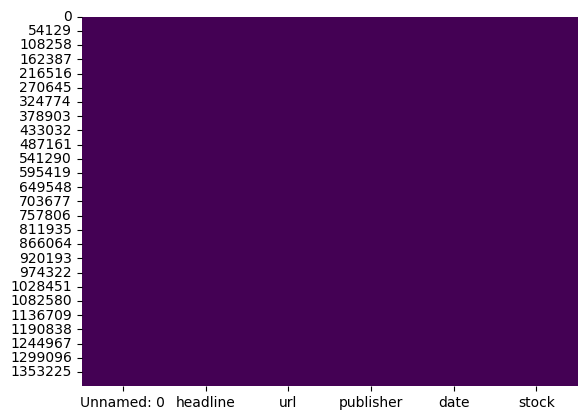

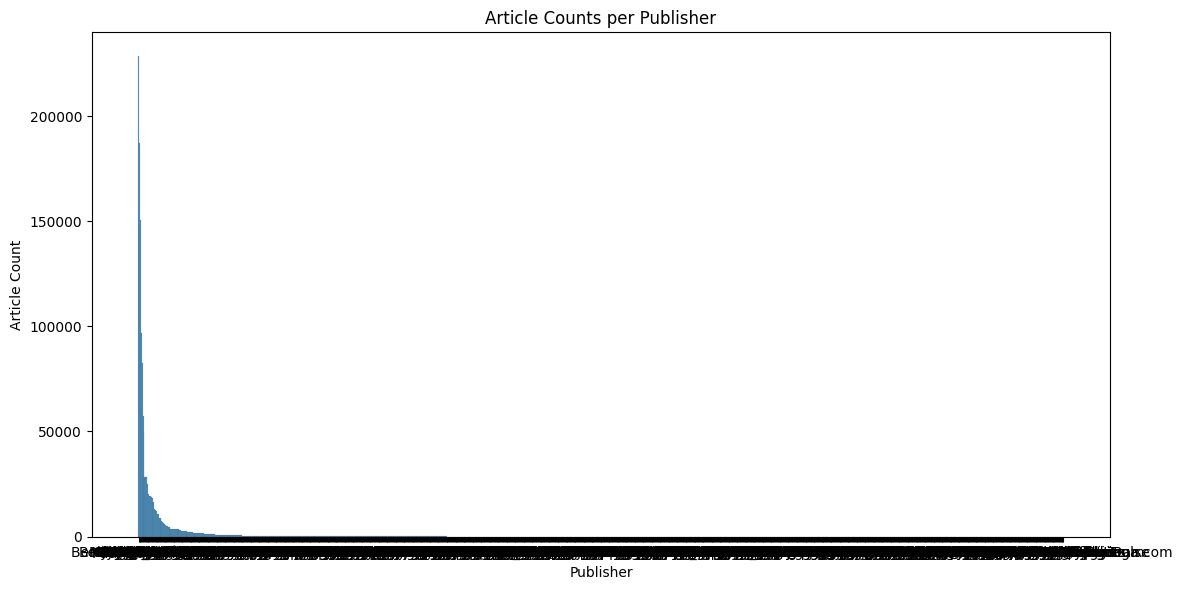

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64
publisher
Goatmug Blog                  1
Christian Fromhertz           1
swenstock                     1
BuyAndHoldPlus                1
Brett's Stock Market Pulse    1
MoneyGeek                     1
muathe                        1
Robert Morris                 1
LeftCoastHedgie               1
Jeremie Capron                1
Name: count, dtype: int64
publisher
PanXchange                      11
Osher Deri                      11
The Stock Trading Advisor       11
Jack Williams                   11
David Russell - TradeStation    11
EidoSearch                      11
Tom Blumer                      11
StockHouse                      11
Ross Drew                       11
Lar

Text(0, 0.5, 'Article Count')

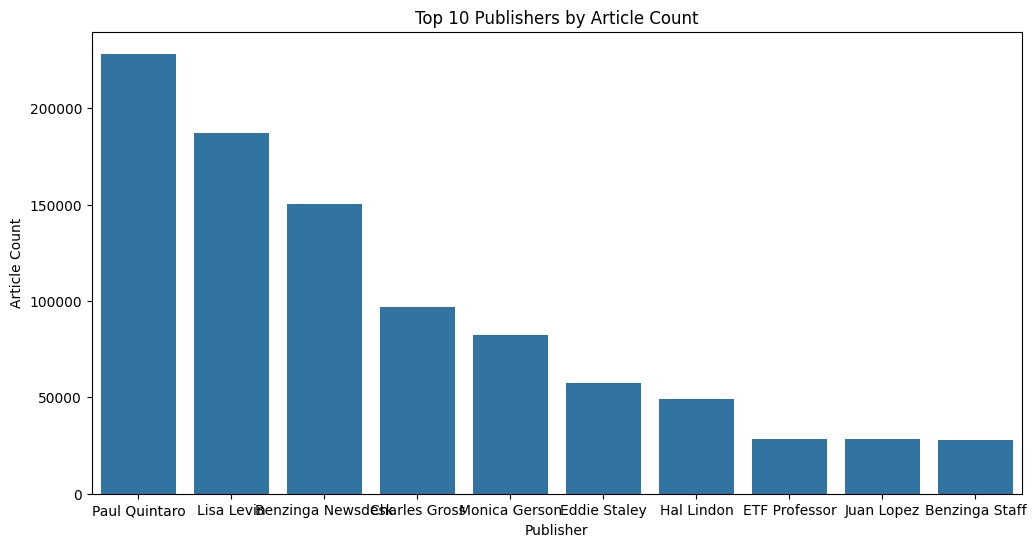

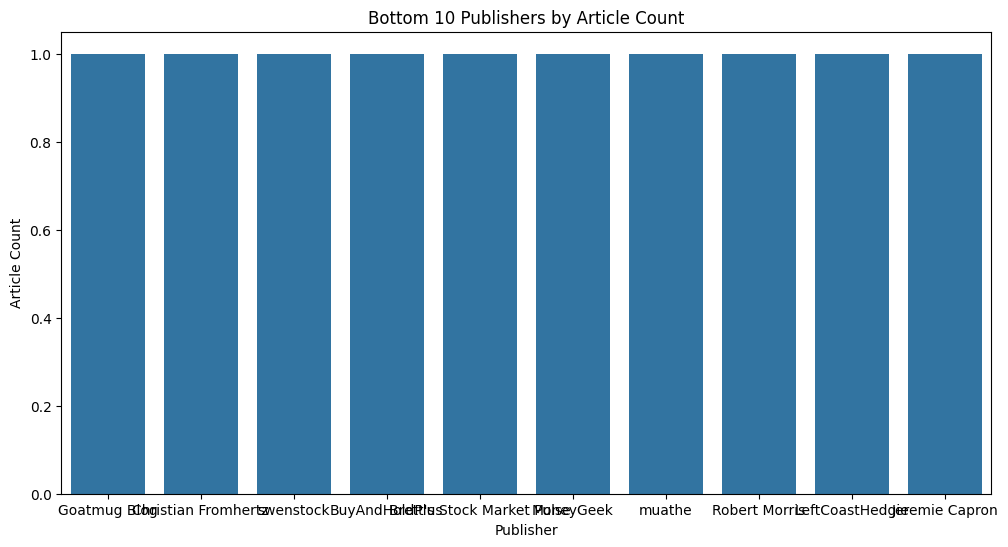

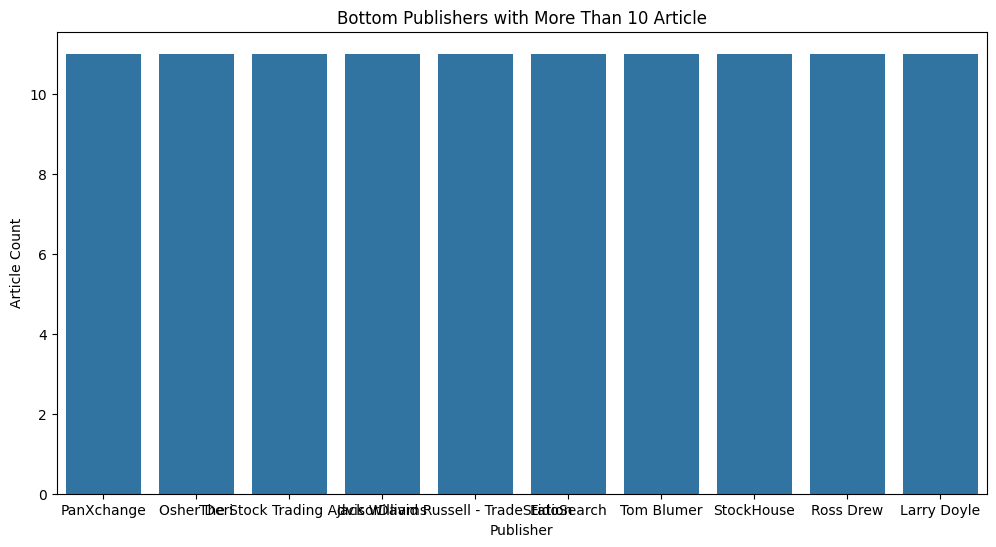

In [ ]:

%pip install pandas seaborn
import pandas as pd
#%pip install 
import seaborn as sns
df = pd.read_csv('data/raw_analyst_ratings.csv')
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
#Identify duplicated rows
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
# Drop duplicates
df = df.drop_duplicates()
# Remove index column 
df=df.drop('Unnamed: 0', axis=1, errors='ignore')  
# outlier detection
import matplotlib.pyplot as plt
df['headline_length'] = df['headline'].str.len()
#clean outlier
df_cleaned = df.dropna(subset=['headline', 'publisher', 'date', 'stock'])
df_cleaned.to_csv('data/raw_analyst_ratings_cleaned.csv', index=False)
# Headline length
df=pd.read_csv('data/raw_analyst_ratings_cleaned.csv')
print(f"Number of raws after cleaning: {len(df_cleaned)}")
df['headline_length'] = df['headline'].str.len()
print(df['headline_length'].describe())
#article per publisher
article_per_publisher = df['publisher'].value_counts()
print(article_per_publisher)
plt.figure(figsize=(12, 6))
sns.histplot(x=article_per_publisher.index, weights=article_per_publisher.values, bins=len(article_per_publisher))
#
plt.title("Article Counts per Publisher")
plt.xlabel("Publisher")
plt.ylabel("Article Count")
plt.tight_layout()
plt.show()
top10_publishers = article_per_publisher.head(10)
print(top10_publishers)
# Plot top 10 publishers
plt.figure(figsize=(12, 6)) 
sns.barplot(x=top10_publishers.index, y=top10_publishers.values)
plt.title("Top 10 Publishers by Article Count")
plt.xlabel("Publisher")
plt.ylabel("Article Count")
# Show the 10 publishers with the fewest articles
bottom10_publishers = article_per_publisher.tail(10)
print(bottom10_publishers)
plt.figure(figsize=(12, 6))
sns.barplot(x=bottom10_publishers.index, y=bottom10_publishers.values)
plt.title("Bottom 10 Publishers by Article Count")
plt.xlabel("Publisher")
plt.ylabel("Article Count")
 #Show the 10 publishers with the fewest articles (but more than 10)
bottom_publishers_gt10 = article_per_publisher[article_per_publisher > 10].tail(10)
print(bottom_publishers_gt10)
plt.figure(figsize=(12, 6))
sns.barplot(x=bottom_publishers_gt10.index, y=bottom_publishers_gt10.values)
plt.title("Bottom Publishers with More Than 10 Article")
plt.xlabel("Publisher")
plt.ylabel("Article Count")


In [ ]:
#Get the top 10 publishers
top10_publishers = article_per_publisher.head(10).index
#  Filter the DataFrame for only these publishers
top_publishers_df = df[df['publisher'].isin(top10_publishers)]

# Group by publisher and stock, and count the number of articles
publisher_stock_counts = top_publishers_df.groupby(['publisher', 'stock']).size().unstack(fill_value=0)

print(publisher_stock_counts)
# Total number of publications per stock
publications_per_stock = df['stock'].value_counts().sort_index()
print(publications_per_stock)
top10_stocks = df['stock'].value_counts().head(30)
print(top10_stocks)
df = pd.read_csv('data/raw_analyst_ratings.csv')
print(f"Number of rows after : {len(df_cleaned)}")
article_per_publication_date  = pd.to_datetime(df['date'], errors='coerce')
print(df['date'].head())
invalid_dates = df[df['date'].isnull()]
print(f"Invalid dates found: {len(invalid_dates)}")
counts_by_date = article_per_publication_date.dt.date.value_counts().sort_index()
print(counts_by_date)

# Count articles per stock and print all stocks
print(f"Number of unique stocks: {df['stock'].unique()}")
counts_by_stock = df['stock'].value_counts().sort_index()
print(counts_by_stock)



stock                A   AA  AAC  AADR  AAL  AAMC  AAME  AAN  AAOI  AAON  ...  \
publisher                                                                 ...   
Benzinga Newsdesk   81  109   23     0  229    10     9   42    55    21  ...   
Benzinga Staff     438   76    3     0    0     0     4   11     0     3  ...   
Charles Gross       27  175   12     0    4     2     0   23    18     1  ...   
ETF Professor        0   29    0     2    0     0     0    0     0     0  ...   
Eddie Staley        27   65    5     0   29     1     2   10    17     5  ...   
Hal Lindon          36   72   10     0   10     3     7   18    13     4  ...   
Juan Lopez          33   30    0     0    5     0     0    5     1     0  ...   
Lisa Levin         126  253   57     0    0     6     6   80   114    14  ...   
Monica Gerson       68  216    2     0    0     2     5   21     2    34  ...   
Paul Quintaro      127  297   41     0   98    12    14   98    87    25  ...   

stock              ZOES  ZP

Number of publications for AAPL: 441
Number of publications for AMZN: 278
Number of publications for NVDA: 3146
Number of publications for TSLA: 1875
Number of publications for ['GOOG', 'GOOGL']: 2778
Number of publications for ['MSFT', 'MSF']: 12
Number of publications for ['META', 'FB']: 380


Text(0, 0.5, 'Publication Count')

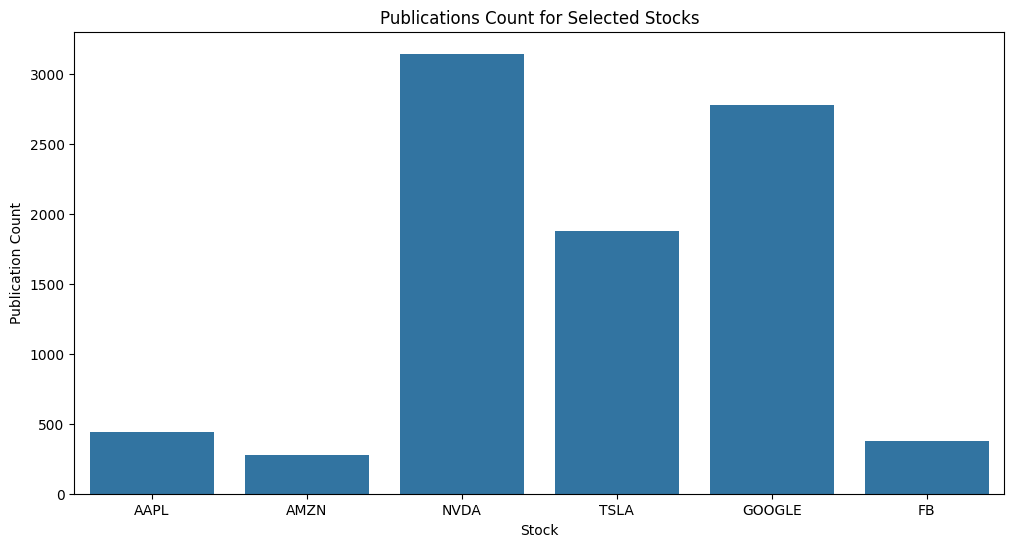

In [52]:
# publications per stock
stock_name = 'AAPL'  
count = df[df['stock'] == stock_name].shape[0]
print(f"Number of publications for {stock_name}: {count}")
# publications per stock
stock_name = 'AMZN'  
count = df[df['stock'] == stock_name].shape[0]
print(f"Number of publications for {stock_name}: {count}")
# publications per stock
stock_name = 'NVDA'  
count = df[df['stock'] == stock_name].shape[0]
print(f"Number of publications for {stock_name}: {count}")
# publications per stock
stock_name = 'TSLA'  
count = df[df['stock'] == stock_name].shape[0]
print(f"Number of publications for {stock_name}: {count}")
# publications per stock
stock_names = ['GOOG', 'GOOGL']  
count = df[df['stock'].isin(stock_names)].shape[0]
print(f"Number of publications for {stock_names}: {count}")
# publications per stock
stock_names = ['MSFT', 'MSF'] 
count = df[df['stock'].isin(stock_names)].shape[0]
print(f"Number of publications for {stock_names}: {count}")
# publications per stock
stock_names = ['META', 'FB'] 
count = df[df['stock'].isin(stock_names)].shape[0]
print(f"Number of publications for {stock_names}: {count}")
# List of stocks you want to plot
df_plot = df.copy()
df_plot['stock'] = df_plot['stock'].replace({'GOOG': 'GOOGLE', 'GOOGL': 'GOOGLE'})
selected_stocks = ['AAPL', 'AMZN', 'NVDA', 'TSLA', 'GOOGLE', 'FB']
# Filter the DataFrame for the selected stocks
df_selected = df_plot[df_plot['stock'].isin(selected_stocks)]
# Count publications for selected stocks
stock_counts = df_selected['stock'].value_counts().reindex(selected_stocks, fill_value=0)
# Plotting the counts of publications for selected stocks
plt.figure(figsize=(12, 6))
sns.barplot(x=stock_counts.index, y=stock_counts.values)
plt.title("Publications Count for Selected Stocks")
plt.xlabel("Stock")
plt.ylabel("Publication Count")

C:\Users\Yohanan\AppData\Local\Temp\ipykernel_7432\2564997742.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['date'].dt.to_period('M')


year_month
2011-04       6
2011-05      78
2011-06      96
2011-07     137
2011-08     149
           ... 
2020-02    2356
2020-03    4680
2020-04    4616
2020-05    9333
2020-06    5990
Freq: M, Name: count, Length: 111, dtype: int64
year
2011.0      760
2012.0     1187
2013.0     1240
2014.0     1189
2015.0     3695
2016.0     4223
2017.0     3581
2018.0     5395
2019.0     6325
2020.0    28392
Name: count, dtype: int64
weekday
Friday        9381
Monday       10322
Saturday       267
Sunday         436
Thursday     12688
Tuesday      11002
Wednesday    11891
Name: count, dtype: int64


Text(0, 0.5, 'Article Count')

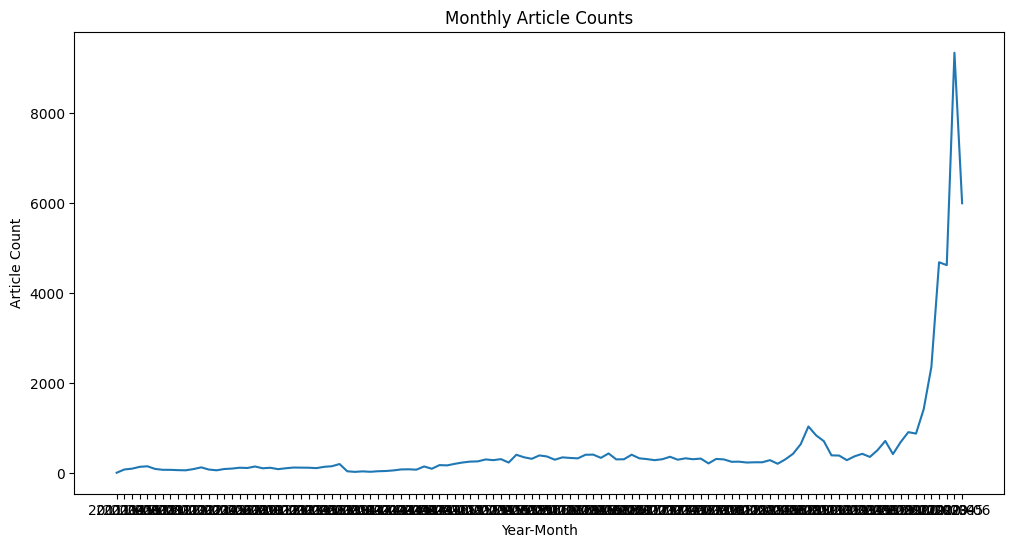

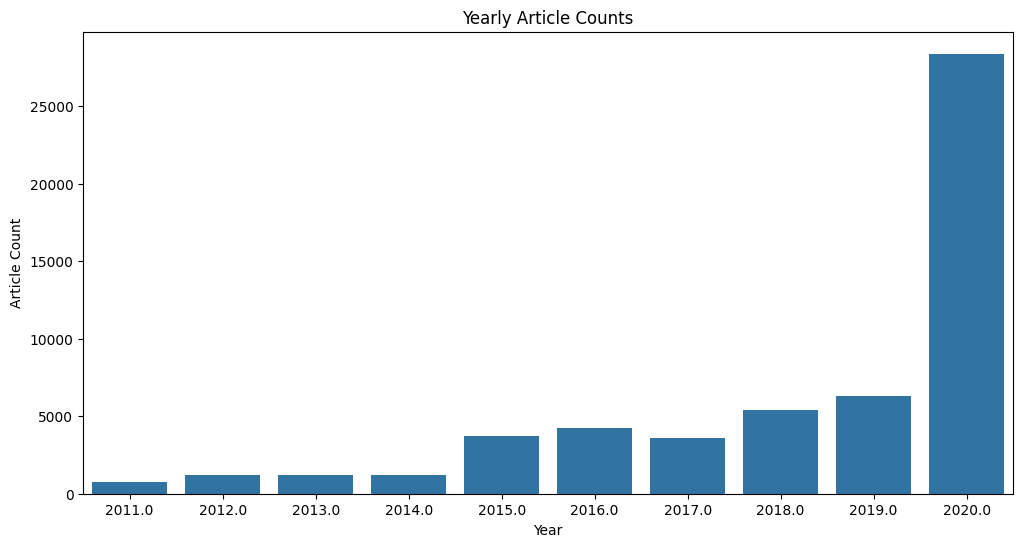

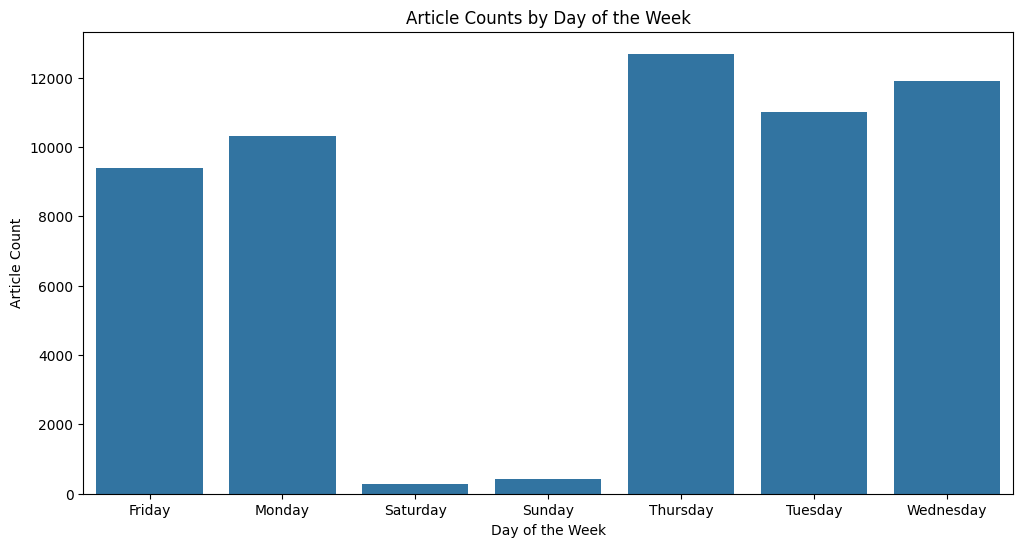

In [47]:
# Extract date components
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['year_month'] = df['date'].dt.to_period('M')
df['weekday'] = df['date'].dt.day_name() 
# Count articles per month
monthly_counts = df['year_month'].value_counts().sort_index()
print(monthly_counts)
# Plotting the monthly counts
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_counts.index.astype(str), y=monthly_counts.values)
plt.title("Monthly Article Counts")
plt.xlabel("Year-Month")
plt.ylabel("Article Count")
# Count articles per year
yearly_counts = df['year'].value_counts().sort_index()
print(yearly_counts)
# Plotting the yearly counts
plt.figure(figsize=(12, 6))
sns.barplot(x=yearly_counts.index, y=yearly_counts.values)
plt.title("Yearly Article Counts")
plt.xlabel("Year")
plt.ylabel("Article Count")
# Count articles per day of the week
weekday_counts = df['weekday'].value_counts().sort_index()
print(weekday_counts)
# Plotting the weekday counts
plt.figure(figsize=(12, 6))
sns.barplot(x=weekday_counts.index, y=weekday_counts.values)
plt.title("Article Counts by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Article Count")



In [37]:
%pip install sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['headline'].dropna())

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

terms = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    print(f"Topic #{idx}:")
    print([terms[i] for i in topic.argsort()[-10:]])

  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


ModuleNotFoundError: No module named 'sklearn'